WK3 - DAY 5 (20/06/2025)
MINI PROJET - EXERCICES

Dataset
The US Superstore Dataset contains the following attributes:

Row ID: Unique ID for each row.
Order ID: Unique Order ID for each Customer.
Order Date: Order Date of the product.
Ship Date: Shipping Date of the Product.
Ship Mode: Shipping Mode specified by the Customer.
Customer ID: Unique ID to identify each Customer.
Customer Name: Name of the Customer.
Segment: The segment where the Customer belongs.
Country: Country of residence of the Customer.
City: City of residence of the Customer.
State: State of residence of the Customer.
Postal Code: Postal Code of every Customer.
Region: Region where the Customer belongs.
Product ID: Unique ID of the Product.
Category: Category of the product ordered.
Sub-Category: Sub-Category of the product ordered.
Product Name: Name of the Product.
Sales: Sales of the Product.
Quantity: Quantity of the Product.
Discount: Discount provided.
Profit: Profit/Loss incurred.


Task
First load the dataset in a notebook and preprocess it. Then use visualisations to address the following questions:

Which states have the most sales?
What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
Who is an outstanding customer in New York?
Are there any differences among states in profitability?
The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)
What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)
What are the Top 20 customers by Sales?
Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

In [52]:
#Task
#First load the dataset in a notebook and preprocess it. 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Data load :
df = pd.read_excel("US Superstore data.xls")  

print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [54]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [55]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [56]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [57]:
# Chack missing data
print(df.isna().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [58]:
# Convert dates :
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

<Axes: xlabel='State'>

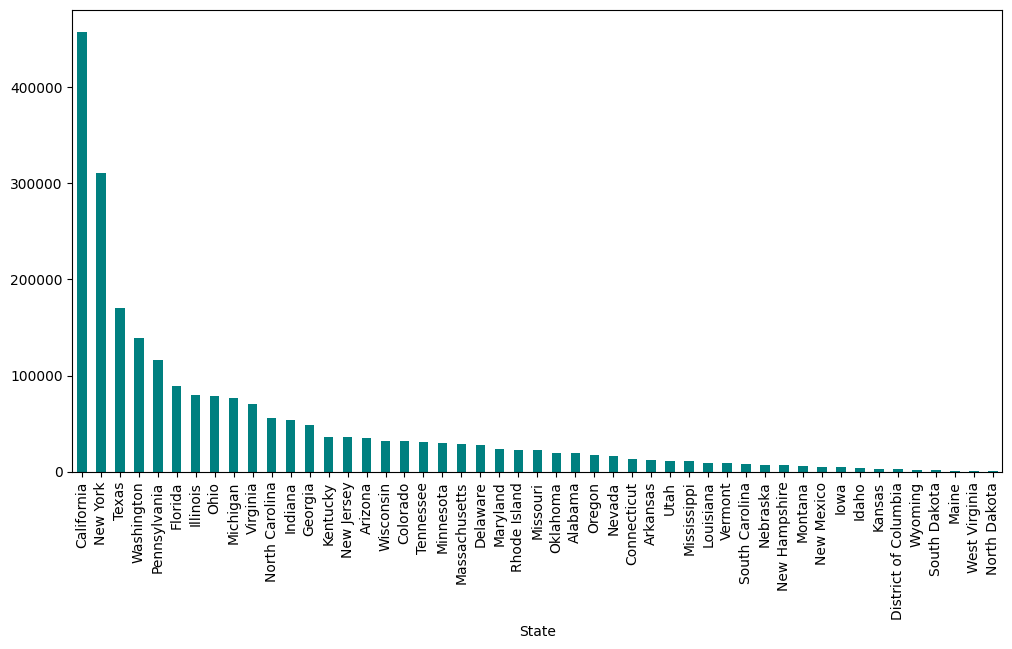

In [59]:
#Then use visualisations to address the following questions:
    #Which states have the most sales?

sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='bar', color='teal')

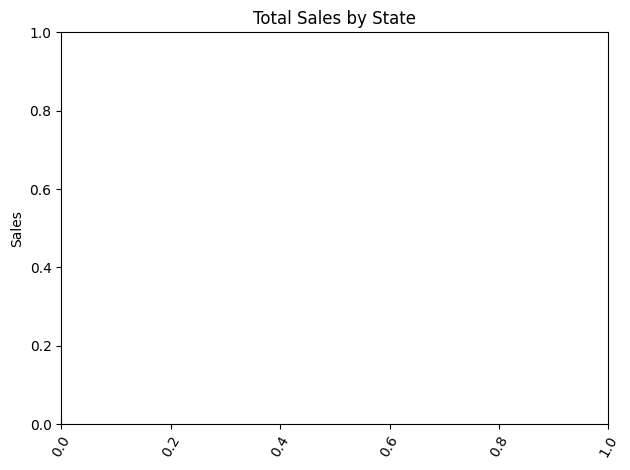

In [60]:
plt.title("Total Sales by State")
plt.ylabel("Sales")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [61]:
#Then use visualisations to address the following questions:
    #What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)

ny_ca = df[df['State'].isin(['New York', 'California'])]
summary = ny_ca.groupby('State').agg({'Sales':'sum','Profit':'sum'}).reset_index()
print(summary)

        State        Sales      Profit
0  California  457687.6315  76381.3871
1    New York  310876.2710  74038.5486


In [62]:
df = pd.DataFrame({
    'State': ['New York', 'California'],
    'Sales': ['sum', 'sum']
})

In [63]:
filtered_df = df[df['State'].isin(['New York', 'California'])]

In [ ]:
# 2. Grouper par État et faire la somme des ventes et profits
summary = filtered_df.groupby('State')[['Sales','Profit']].sum().reset_index()

# 3. Afficher le graphique
summary.plot(x='State', y=['Sales', 'Profit'], kind='bar', figsize=(8, 5))
plt.title("Sales vs Profit: NY vs CA")
plt.ylabel("USD")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

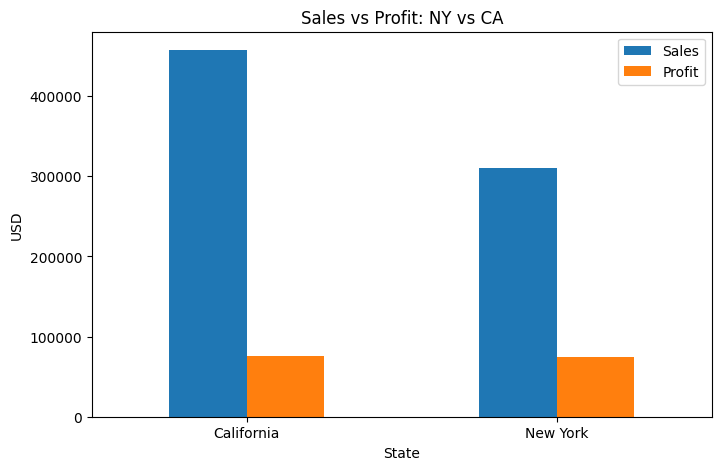

In [67]:
summary.plot(x='State', y=['Sales','Profit'], kind='bar', figsize=(8,5))
plt.title("Sales vs Profit: NY vs CA")
plt.ylabel("USD")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Then use visualisations to address the following questions:
    #Who is an outstanding customer in New York?

ny_df = df[df['State']=='New York']
top_customer = ny_df.groupby('Customer Id')['Sales'].sum().sort_values(ascending=False).head(1)
print("Top customer in NY:", top_customer)

KeyError: 'Customer Name'

In [71]:
#Then use visualisations to address the following questions:
    #Are there any differences among states in profitability?

profit_by_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
profit_by_state.plot(kind='bar', color='salmon')
plt.title("Total Profit by State")
plt.ylabel("Profit")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

KeyError: 'Column not found: Profit'

In [ ]:
#The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)

cust_profit = df.groupby('Customer Id')['Profit'].sum().sort_values(ascending=False)
cum = cust_profit.cumsum()
total = cust_profit.sum()
perc = 100 * cum / total

plt.figure(figsize=(8,5))
plt.plot(perc.values)
plt.axhline(80, color='red', linestyle='--')
plt.axvline(len(cust_profit)*0.2, color='green', linestyle='--')
plt.title("Pareto Check: Customers vs Profit")
plt.xlabel("Customer Rank")
plt.ylabel("Cumulative % of Profit")
plt.show()

In [ ]:
#What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)

city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
city_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)

fig, axes = plt.subplots(1,2, figsize=(14,6))
city_sales.plot(kind='bar', ax=axes[0], color='teal'); axes[0].set_title("Top 20 Cities by Sales")
city_profit.plot(kind='bar', ax=axes[1], color='orange'); axes[1].set_title("Top 20 Cities by Profit")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [ ]:
#What are the Top 20 customers by Sales?
top20_cust_sales = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(20)
print(top20_cust_sales)

#Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?

cust_sales = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False)
cum_sales = 100 * cust_sales.cumsum() / cust_sales.sum()

plt.figure(figsize=(8,5))
plt.plot(cum_sales.values)
plt.axhline(80, color='red', linestyle='--')
plt.axvline(len(cust_sales)*0.2, color='green', linestyle='--')
plt.title("Pareto Check: Customers vs Sales")
plt.xlabel("Customer Rank")
plt.ylabel("Cumulative % of Sales")
plt.show()

#Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.
    #Priority States: those with high sales and high profits (e.g., CA, NY, TX).
    #Priority Cities: those appearing in both top 20 lists.
    #Key Clients: focus on the top 20% of clients who generate 80% of sales/profits.

1️⃣ Import et prétraitement

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("superstore.csv")  # remplace le chemin si nécessaire

# Vérifier les données manquantes
print(df.isna().sum())

# Retirer les lignes avec des valeurs manquantes critiques
df.dropna(subset=['State', 'City', 'Customer ID', 'Sales', 'Profit'], inplace=True)

# Convertir les dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
2️⃣ États ayant le plus de ventes
python
Copier
Modifier
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='bar', color='teal')
plt.title("Total Sales by State")
plt.ylabel("Sales")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()
3️⃣ Comparaison New York vs Californie (ventes & profits)
python
Copier
Modifier
ny_ca = df[df['State'].isin(['New York', 'California'])]
summary = ny_ca.groupby('State').agg({'Sales':'sum','Profit':'sum'}).reset_index()
print(summary)

summary.plot(x='State', y=['Sales','Profit'], kind='bar', figsize=(8,5))
plt.title("Sales vs Profit: NY vs CA")
plt.ylabel("USD")
plt.xticks(rotation=0)
plt.show()
4️⃣ Client remarquable à New York
python
Copier
Modifier
ny_df = df[df['State']=='New York']
top_customer = ny_df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(1)
print("Top customer in NY:", top_customer)
5️⃣ Différences selon les états en rentabilité
python
Copier
Modifier
profit_by_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
profit_by_state.plot(kind='bar', color='salmon')
plt.title("Total Profit by State")
plt.ylabel("Profit")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()
6️⃣ Principe de Pareto sur les clients vs profit
python
Copier
Modifier
cust_profit = df.groupby('Customer ID')['Profit'].sum().sort_values(ascending=False)
cum = cust_profit.cumsum()
total = cust_profit.sum()
perc = 100 * cum / total

plt.figure(figsize=(8,5))
plt.plot(perc.values)
plt.axhline(80, color='red', linestyle='--')
plt.axvline(len(cust_profit)*0.2, color='green', linestyle='--')
plt.title("Pareto Check: Customers vs Profit")
plt.xlabel("Customer Rank")
plt.ylabel("Cumulative % of Profit")
plt.show()
👉 Si la courbe franchit 80 % vers 20 % des clients, le principe s'applique.

7️⃣ Top 20 villes par ventes et par profit
python
Copier
Modifier
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
city_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)

fig, axes = plt.subplots(1,2, figsize=(14,6))
city_sales.plot(kind='bar', ax=axes[0], color='teal'); axes[0].set_title("Top 20 Cities by Sales")
city_profit.plot(kind='bar', ax=axes[1], color='orange'); axes[1].set_title("Top 20 Cities by Profit")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()
👉 Analyse les différences entre les villes les plus vendeuses et les plus profitables.

8️⃣ Top 20 clients par ventes
python
Copier
Modifier
top20_cust_sales = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(20)
print(top20_cust_sales)
9️⃣ Courbe cumulative des ventes par client (Pareto)
python
Copier
Modifier
cust_sales = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False)
cum_sales = 100 * cust_sales.cumsum() / cust_sales.sum()

plt.figure(figsize=(8,5))
plt.plot(cum_sales.values)
plt.axhline(80, color='red', linestyle='--')
plt.axvline(len(cust_sales)*0.2, color='green', linestyle='--')
plt.title("Pareto Check: Customers vs Sales")
plt.xlabel("Customer Rank")
plt.ylabel("Cumulative % of Sales")
plt.show()
🎯 Recommandations pour stratégies marketing
États prioritaires : ceux avec fortes ventes et forts profits (ex. CA, NY, TX).

Villes prioritaires : celles apparaissant dans les deux top 20.

Clients clés : se concentrer sur le top 20 % des clients qui génèrent 80 % des ventes/profits.

💡 Astuce finale : tu peux exporter tes résultats ou graphiques sous forme de CSV ou images pour les partager facilement dans un rapport ou une présentation.

Veux-tu que je t’aide à automatiser cette analyse dans un notebook complet ?